# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [52]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [53]:
import numpy as np
import pandas as pd  # your favorite data package
import matplotlib.pyplot as plt  # your favorite visualization package
import seaborn as sns

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [54]:
df = pd.read_csv('train.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [56]:
df.drop('dropoff_datetime', inplace=True, axis=1)
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

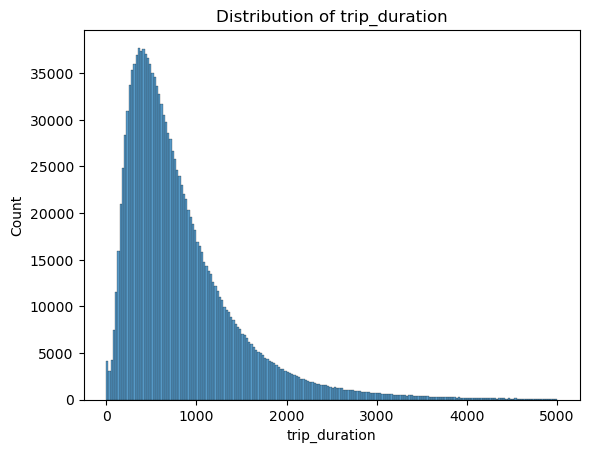

In [57]:
sns.histplot(data=df, x='trip_duration', bins=200, binrange=(0, 5000))
plt.title('Distribution of trip_duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Овет**: БОльшая масса поездок имеет маленький duration, есть сильные выбросы?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Овет**: Потому что у нас есть довольно радикальные выбросы а логарифм эти выбросы гасит

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $RMSLE(X, y, a) = RMSE(X, ln(1+y), ln(1+a))$. Функция $ln(1+x)$ монотонно возрастающая $\Rightarrow$ минимум $RMSLE(X, y, a)$ достигается в минимуме $RMSE(X, ln(1+y), ln(1+a)) = RMSE(X, \hat{y}, \hat{a})$. Так как оптимищация $MSE$ эквивалентна оптимищации $RMSE$: минимум $RMSLE(X, y, a)$ достигается в минимуме $MSE(X, \hat{y}, \hat{a})$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [58]:
df['log_trip_duration'] = np.log1p(df.trip_duration)
df.drop('trip_duration', axis=1, inplace=True)

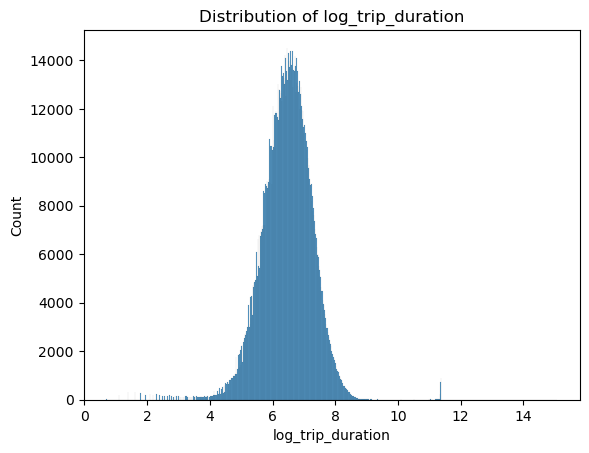

In [59]:
sns.histplot(data=df, x='log_trip_duration')
plt.title('Distribution of log_trip_duration')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [60]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.square(log1p_y_pred - log1p_y_true)))
    raise NotImplementedError

rmsle_best_const = rmsle(df.log_trip_duration, np.mean(df.log_trip_duration))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [61]:
df.sample(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
1255880,id2388580,2,2016-06-18 19:45:32,3,-73.986725,40.761051,-73.996498,40.752956,N,6.501290
1335710,id3957208,2,2016-02-29 20:53:44,1,-74.003502,40.726711,-73.956078,40.772171,N,6.926577


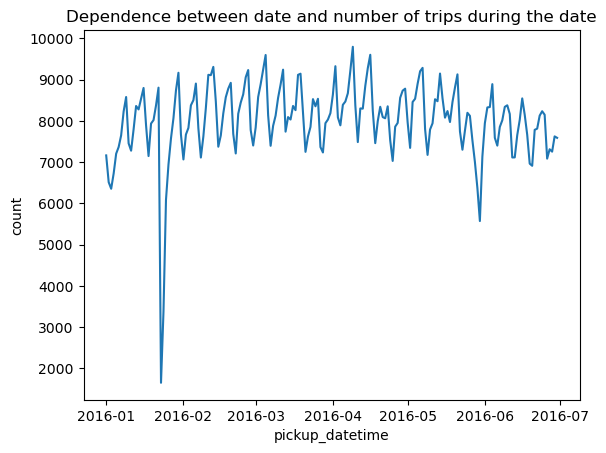

In [62]:
helper = df[['pickup_datetime', 'id']].copy()
helper.pickup_datetime = helper.pickup_datetime.dt.date
helper = helper.groupby('pickup_datetime').size().reset_index(name='count')
sns.lineplot(data=helper, x='pickup_datetime', y='count')
plt.title('Dependence between date and number of trips during the date')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [63]:
helper.sort_values('count', ascending=True).head(15)

,pickup_datetime,count
22,2016-01-23,1648
23,2016-01-24,3383
150,2016-05-30,5570
24,2016-01-25,6084
2,2016-01-03,6353
149,2016-05-29,6372
1,2016-01-02,6512
3,2016-01-04,6725
171,2016-06-20,6910
25,2016-01-26,6941


23 - 23 января 2016 года была сильная метель

19 - 20 июня 2016 были длинные выходные в НЙ

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [64]:
helper = df[['pickup_datetime', 'id']].copy()
helper['hour'] = helper['pickup_datetime'].dt.hour
helper['month'] = helper['pickup_datetime'].dt.month
helper['day_of_week'] = helper['pickup_datetime'].dt.dayofweek 

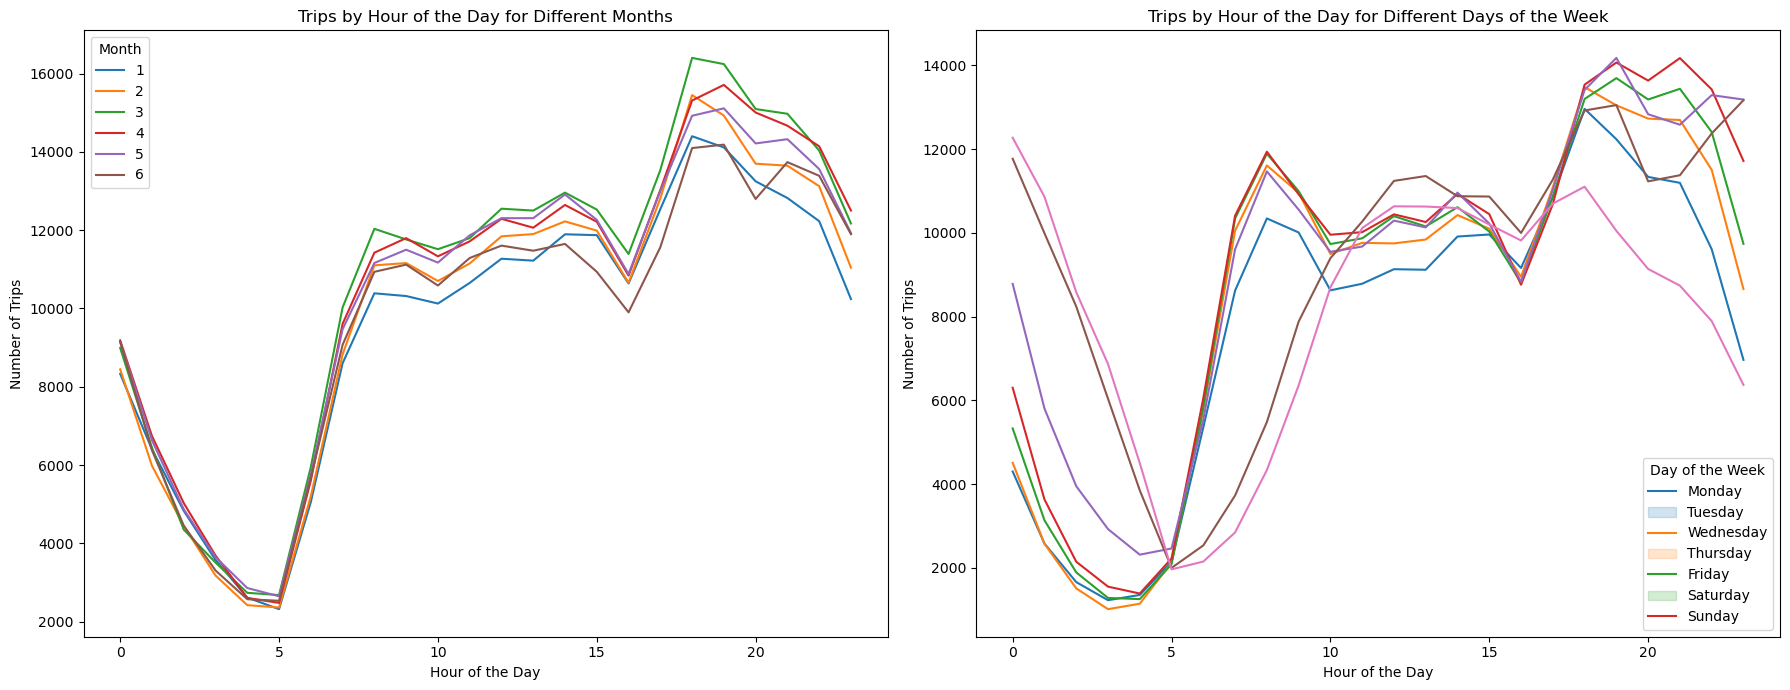

In [65]:
hourly_monthly_counts = helper.groupby(['hour', 'month']).size().reset_index(name='trip_count')
hourly_weekday_counts = helper.groupby(['hour', 'day_of_week']).size().reset_index(name='trip_count')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.lineplot(data=hourly_monthly_counts, x='hour', y='trip_count', hue='month', palette='tab10', ax=axes[0])
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Trips')
axes[0].set_title('Trips by Hour of the Day for Different Months')
axes[0].legend(title='Month')

sns.lineplot(data=hourly_weekday_counts, x='hour', y='trip_count', hue='day_of_week', palette='tab10', ax=axes[1])
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Trips')
axes[1].set_title('Trips by Hour of the Day for Different Days of the Week')
axes[1].legend(title='Day of the Week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Колличество поездок по месяцам плюс минус одинаковое (в рамках погрешности), по неделям тоже, а вот зависимость по часам дня явно прослежтвается, просадок в 5 ночи а пик около 20

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

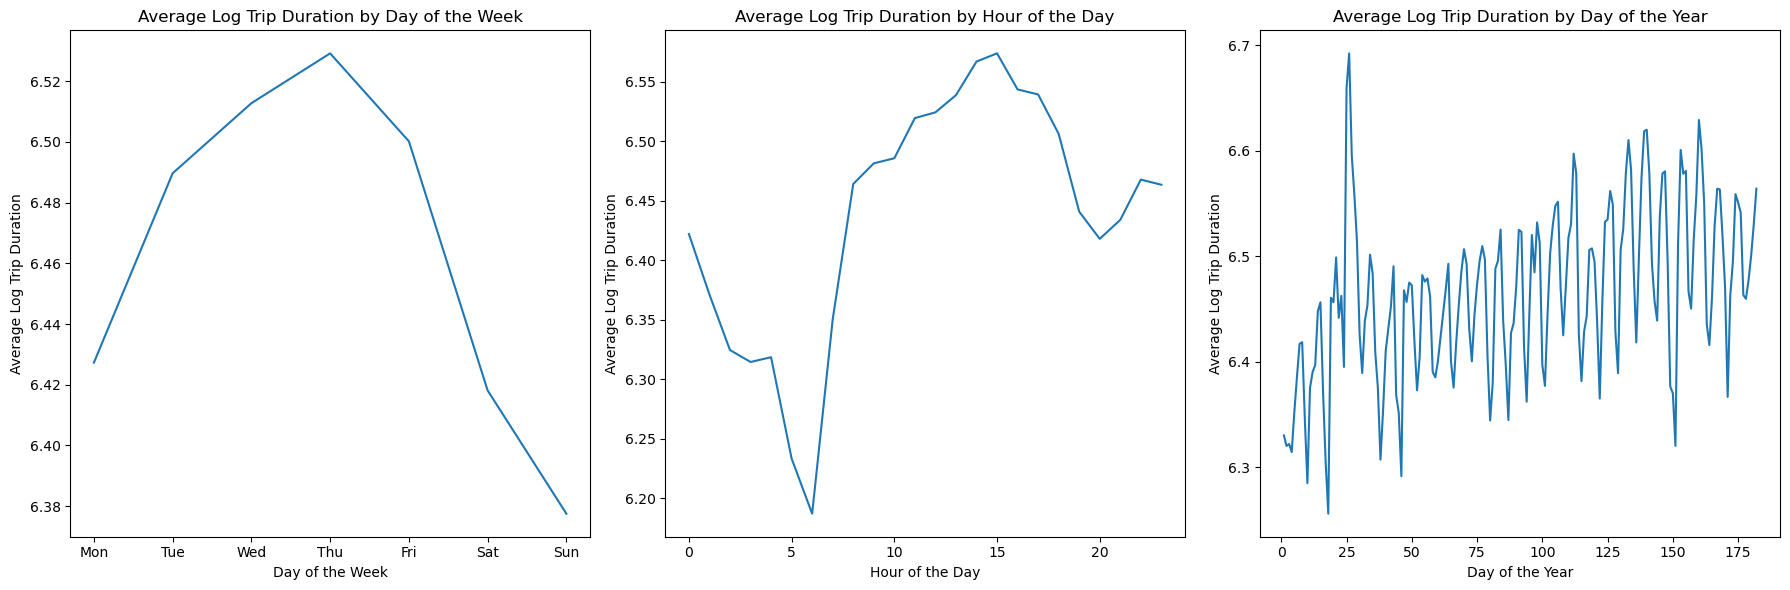

In [66]:
from sklearn.model_selection import train_test_split

y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

train_data = X_train.copy()
train_data['log_trip_duration'] = y_train.values

train_data['day_of_week'] = train_data['pickup_datetime'].dt.dayofweek
train_data['hour'] = train_data['pickup_datetime'].dt.hour
train_data['day_of_year'] = train_data['pickup_datetime'].dt.dayofyear

mean_log_trip_by_day_of_week = train_data.groupby('day_of_week')['log_trip_duration'].mean().reset_index()
mean_log_trip_by_hour = train_data.groupby('hour')['log_trip_duration'].mean().reset_index()
mean_log_trip_by_day_of_year = train_data.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.lineplot(data=mean_log_trip_by_day_of_week, x='day_of_week', y='log_trip_duration', ax=axes[0])
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Log Trip Duration')
axes[0].set_title('Average Log Trip Duration by Day of the Week')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

sns.lineplot(data=mean_log_trip_by_hour, x='hour', y='log_trip_duration', ax=axes[1])
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Log Trip Duration')
axes[1].set_title('Average Log Trip Duration by Hour of the Day')

sns.lineplot(data=mean_log_trip_by_day_of_year, x='day_of_year', y='log_trip_duration', ax=axes[2])
axes[2].set_xlabel('Day of the Year')
axes[2].set_ylabel('Average Log Trip Duration')
axes[2].set_title('Average Log Trip Duration by Day of the Year')

plt.tight_layout()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Кажется что график зависимости таргета от часа суток похож на график зависимости числа поездок от часа суток. На графике зависимости длины поезди от номера дня в году аномальные дни сглаживаются и уходят тк мы логарифмируем. Так же на этом графике видно не сильную положительную линейную завсисимость дня года от таргета

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [67]:
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear

In [68]:
df['is_blizzard'] = (df.groupby('day_of_year')['day_of_year'].transform('size') < 3000)
df['is_weekend'] = ((df.groupby('day_of_year')['day_of_year'].transform('size') > 4000) & (df.groupby('day_of_year')['day_of_year'].transform('size') < 6000))

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: численный только day_of_year тк у него достаточно большой рендж значений, остальные очев категориальные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [69]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer

y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend']
num = ['day_of_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.7874347953252591


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [70]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [71]:
sample = df.sample(1000)

your_lat_values = sample.pickup_latitude
your_lon_values = sample.pickup_longitude

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Два аэропорта. Выбрал потому что там скопления точек. Важны они так как из аэропорта или в аэропорт поездка будет дольше чем обычно.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [72]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [73]:
df['haversine'] = haversine_array(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [74]:
df['log_haversine'] = np.log1p(df.haversine)

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [75]:
print(f'Correlation of target with haversine = {df.haversine.corr(df.log_trip_duration)}')
print(f'Correlation of target with log_haversine = {df.log_haversine.corr(df.log_trip_duration)}')

Correlation of target with haversine = 0.5735948311180146
Correlation of target with log_haversine = 0.7498822373942491


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

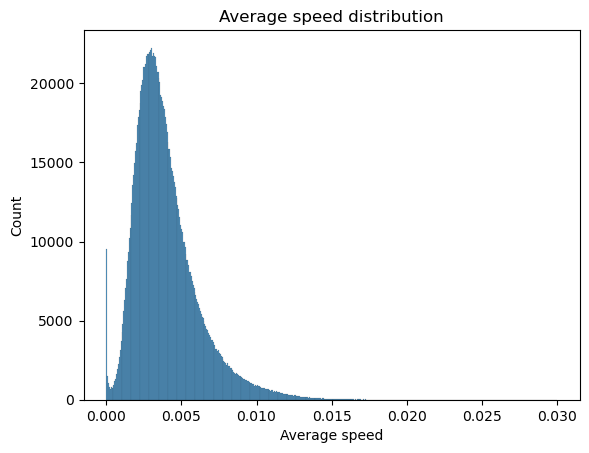

In [76]:
speed = df.haversine / np.exp(df.log_trip_duration)
sns.histplot(x=speed, binrange=(0, 0.03), bins=500)
plt.xlabel('Average speed')
plt.title('Average speed distribution')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [77]:
speed_95quantile = speed.sort_values(ascending=True).iloc[:int(len(speed) * 0.95)]

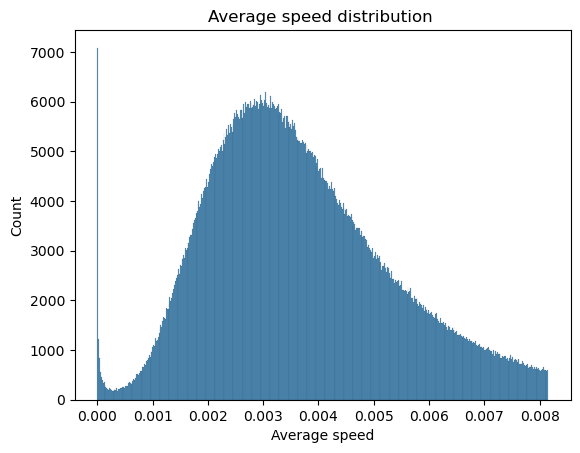

In [78]:
sns.histplot(x=speed_95quantile, bins=500)
plt.xlabel('Average speed')
plt.title('Average speed distribution ')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [79]:
df['speed'] = speed

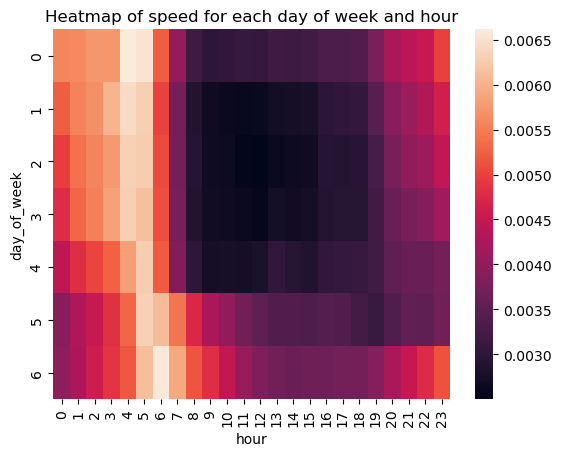

In [80]:
sns.heatmap(df.groupby(['day_of_week', 'hour'])['speed'].median().unstack())
plt.title('Heatmap of speed for each day of week and hour')
plt.show()

In [81]:
df.drop('speed', axis=1, inplace=True)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что оно было получено при помощи значения таргета а на реальных данных значение таргета мы знать не будем

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: днем в будние дни (вероятно в период пробок) скорость минимальна. В 5 часов ночи когда все спят и дороги аустые скорость максимальна

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [82]:
df['traffic'] = (df.day_of_week.between(0, 4) & df.hour.between(9, 12)) | ((df.day_of_week.between(1, 3) & df.hour.between(9, 15)))
df['free_roads'] = ~ df.traffic

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

Потому что если поездка началась или закончилась в аэропорту это значит что время поездки было долгое (влияет на таргет напрямую)

In [83]:
kennedy = [40.6515585, -73.7926754] # lat, lng
laguardia = [40.775715, -73.873364] # lat, lng

df['kennedy_lat'] = kennedy[0]
df['kennedy_lng'] = kennedy[1]
df['laguardia_lat'] = laguardia[0]
df['laguardia_lng'] = laguardia[1]

df['started_kennedy'] = (haversine_array(df.kennedy_lat, df.kennedy_lng, df.dropoff_latitude, df.dropoff_longitude) < 1)
df['ended_kennedy'] = (haversine_array(df.kennedy_lat, df.kennedy_lng, df.pickup_latitude, df.pickup_longitude) < 1)

df['started_laguardia'] = (haversine_array(df.laguardia_lat, df.laguardia_lng, df.dropoff_latitude, df.dropoff_longitude) < 1)
df['ended_laguardia'] = (haversine_array(df.laguardia_lat, df.laguardia_lng, df.pickup_latitude, df.pickup_longitude) < 1)

df.drop(['kennedy_lat', 'kennedy_lng', 'laguardia_lat', 'laguardia_lng'], axis=1, inplace=True)

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

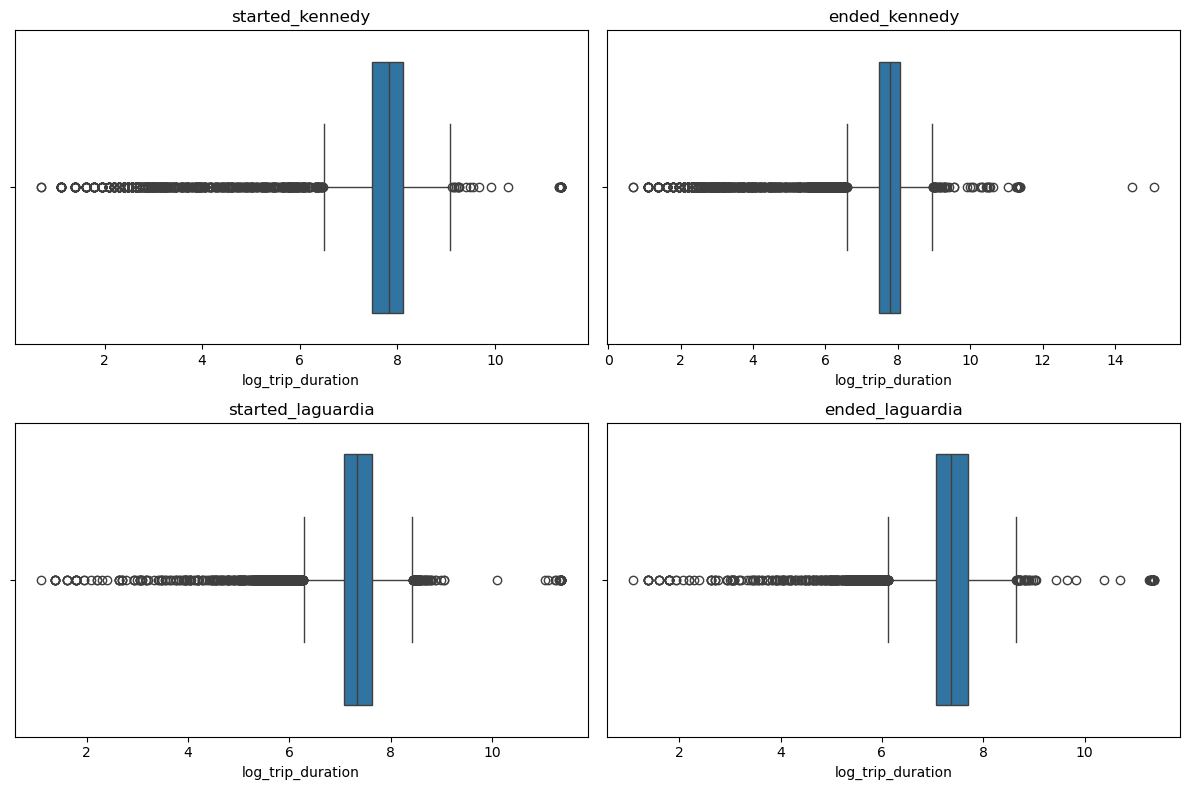

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy indexing
axes = axes.flatten()

# Create boxplots for each feature
for i, feature in enumerate(['started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia']):
    sns.boxplot(x=df[df[feature]].log_trip_duration, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Судя по графику распределения логорифма таргета из начала ДЗ, поездки дольше 6 - 7 это выше среднего, следовательно судя по построенным боксплотам наши признаки выдают как раз поездки выше среднего, что значит что изначальные предположения оказались верны и признаки получились хорошими

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=4, n_cols=3):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.up_border, self.bot_border, self.left_border, self.right_border = 0, 0, 0, 0
        self.lats, self.longs = [], []
        self.ceil_height, self.ceil_width = 0, 0

    def show_map(self):
        m = folium.Map(location=[np.mean(self.lats), np.mean(self.longs)])
        folium.Rectangle(
            bounds=[[self.up_border, self.left_border], [self.bot_border, self.right_border]],
            color='red'
        ).add_to(m)
        
        vertical_lines = np.linspace(self.left_border, self.right_border, self.n_cols + 1)
        for line in vertical_lines:
            folium.PolyLine(
                locations=[[self.up_border, line], [self.bot_border, line]],
                color='red'
            ).add_to(m)
            
        horizontal_lines = np.linspace(self.up_border, self.bot_border, self.n_rows + 1)
        for line in horizontal_lines:
            folium.PolyLine(
                locations=[[line, self.left_border], [line, self.right_border]],
                color='red'
            ).add_to(m)
            
        return m

    def fit(self, X=None, y=None):
        self.lats = pd.concat([df.pickup_latitude, df.dropoff_latitude], axis=0).reset_index(drop=True)
        self.longs = pd.concat([df.pickup_longitude, df.dropoff_longitude], axis=0).reset_index(drop=True)
        self.left_border, self.right_border = np.quantile(self.longs, 0.025), np.quantile(self.longs, 0.975)
        self.bot_border, self.up_border = np.quantile(self.lats, 0.025), np.quantile(self.lats, 0.975)
        self.ceil_height, self.ceil_width = ((self.up_border - self.bot_border) / self.n_rows), ((self.right_border - self.left_border) / self.n_cols)
        
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['begin'], X_copy['end'] = -1, -1
        
        begin_inside = (
            (X_copy.pickup_latitude <= self.up_border)
            &
            (X_copy.pickup_latitude >= self.bot_border)
            &
            (X_copy.pickup_longitude >= self.left_border)
            &
            (X_copy.pickup_longitude <= self.right_border)
        )
        
        end_inside = (
            (X_copy.dropoff_latitude <= self.up_border)
            &
            (X_copy.dropoff_latitude >= self.bot_border)
            &
            (X_copy.dropoff_longitude >= self.left_border)
            &
            (X_copy.dropoff_longitude <= self.right_border)
        )
        
        X_copy.loc[begin_inside, 'begin'] = (
            ((X_copy.loc[begin_inside, 'pickup_latitude'] - self.bot_border) // self.ceil_height) * self.n_cols
            +
            ((X_copy.loc[begin_inside, 'pickup_longitude'] - self.left_border) // self.ceil_width)
        )

        X_copy.loc[end_inside, 'end'] = (
            ((X_copy.loc[end_inside, 'dropoff_latitude'] - self.bot_border) // self.ceil_height) * self.n_cols
            +
            ((X_copy.loc[end_inside, 'dropoff_longitude'] - self.left_border) // self.ceil_width)
        )
        
        return X_copy

In [86]:
transformer = MapGridTransformer()
transformer.fit(df)
df = transformer.transform(df)

In [87]:
transformer.show_map()

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [88]:
y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end']
num = ['day_of_year', 'log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.47708656911124087


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: vendor_id может быть полезен например потому, что один провайдер использует гугл карты, а другой провайдер яндекс карты, а яндекс карты например строят более оптимлаьные (быстрые) маршруты . Большой Passenger_count значит что дольше будет производиться посадка и высадка. Store_and_fwd_flag равный 1 говорит о том что водитель был там, где не было свзяи, а значит он вероятно был далеко от города, а значит поездка была долгой

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [89]:
df[['vendor_id', 'passenger_count', 'store_and_fwd_flag']].nunique()

vendor_id              2
passenger_count       10
store_and_fwd_flag     2
dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<function matplotlib.pyplot.show(close=None, block=None)>

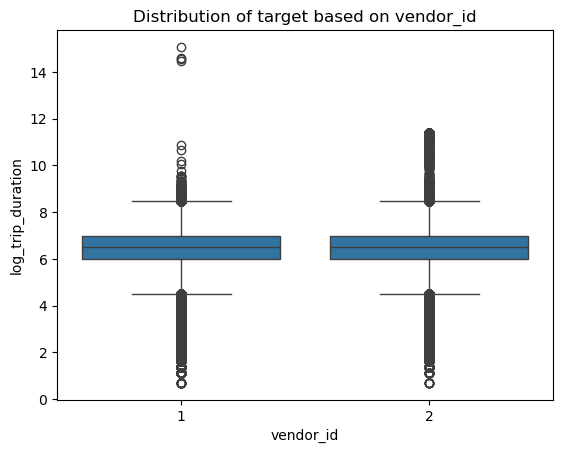

In [90]:
sns.boxplot(df, x='vendor_id', y='log_trip_duration')
plt.title('Distribution of target based on vendor_id')
plt.show

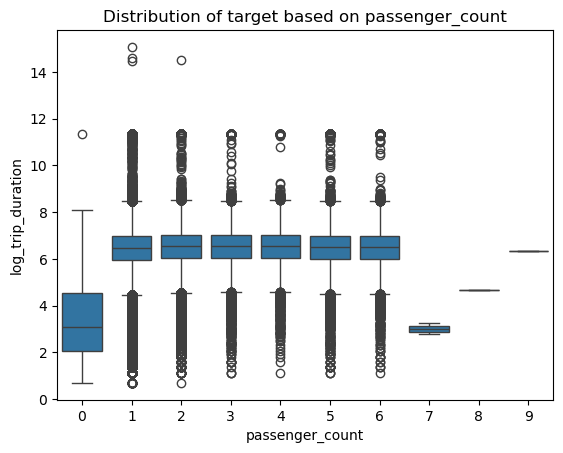

In [91]:
sns.boxplot(df, x='passenger_count', y='log_trip_duration')
plt.title('Distribution of target based on passenger_count')
plt.show()

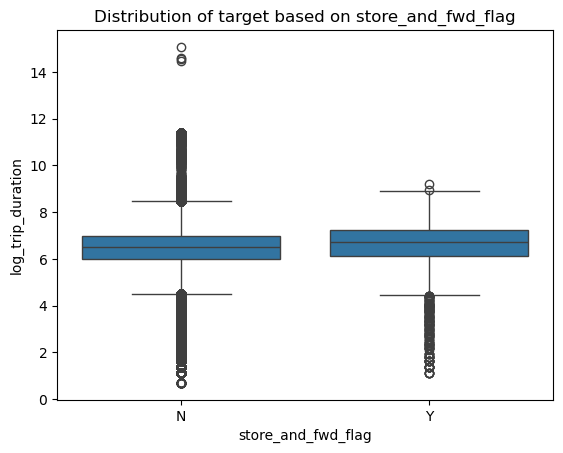

In [92]:
sns.boxplot(df, x='store_and_fwd_flag', y='log_trip_duration')
plt.title('Distribution of target based on store_and_fwd_flag')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [93]:
df.vendor_id -= 1
df.store_and_fwd_flag = df.store_and_fwd_flag.replace({'N': 0, 'Y': 1})

/var/folders/q1/kqhcdmmn5cqf2kgx16fnfm2m0000gn/T/ipykernel_30510/2429034055.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.store_and_fwd_flag = df.store_and_fwd_flag.replace({'N': 0, 'Y': 1})


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Думаю что будут не сильно полезны, так как все боксплоты скапливаются в среднем распределения таргета, другими словами ни один бокслплот не намекает на какую то особенную тенденцию связанную со значением конкретной фичи

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [94]:
y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end',
       'vendor_id', 'passenger_count', 'store_and_fwd_flag']
num = ['day_of_year', 'log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.4768112707072035


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [95]:
df.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], inplace=True, axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [96]:
y = df['log_trip_duration']
X = df.drop(columns=['log_trip_duration'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end']
num = ['day_of_year', 'log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'month',
                                                   'hour', 'is_blizzard',
                                                   'is_weekend', 'traffic',
                                                   'free_roads',
                                                   'started_kennedy',
                                                   'ended_kennedy',
                                                   'started_laguardia',
                                                   'ended_laguardia', 'begin',
                                                   'end']),
                                                 ('num', StandardScaler(),
                                                  ['day_of_year',
                                                   'log_haversine'])])),
                ('ridge', Ridge())])

In [97]:
X_train['residuals'] = y_train - pipeline.predict(X_train)

In [98]:
train_df = pd.concat([X_train, y_train], axis=1)

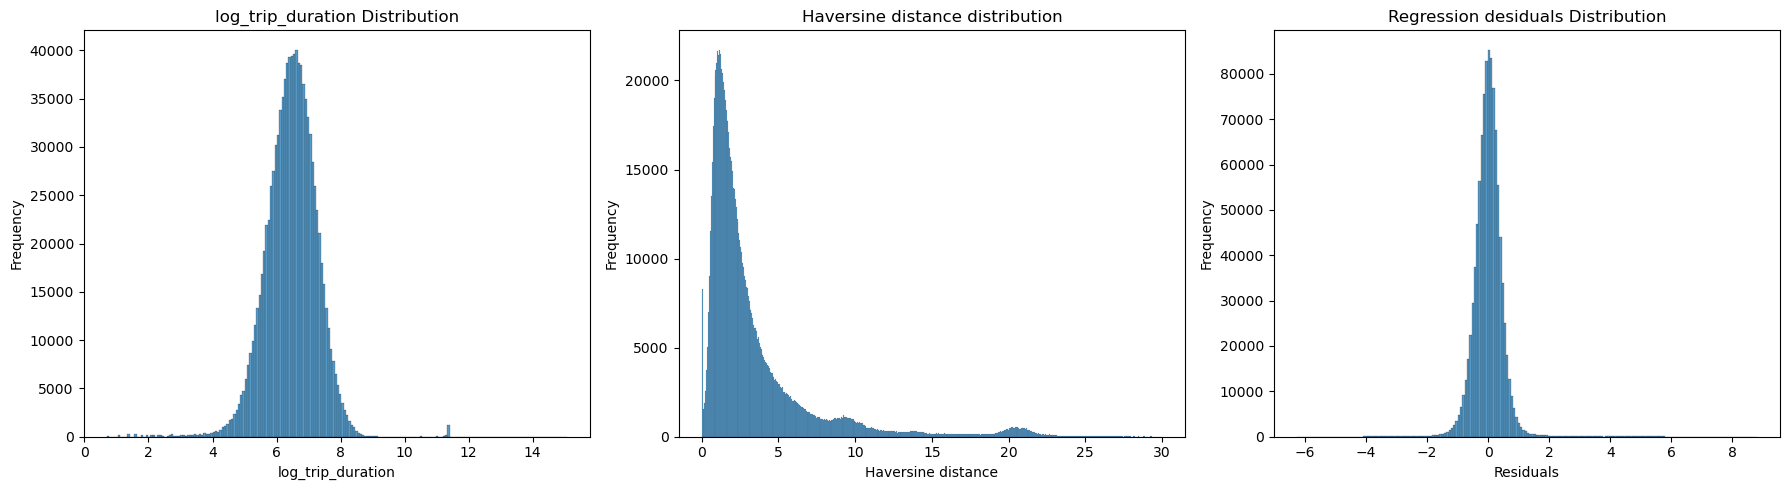

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(x=train_df['log_trip_duration'], bins=200, ax=axes[0])
axes[0].set_title('log_trip_duration Distribution')
axes[0].set_xlabel('log_trip_duration')
axes[0].set_ylabel('Frequency')

sns.histplot(x=train_df['haversine'], bins=500, binrange=(0, 30), ax=axes[1])
axes[1].set_title('Haversine distance distribution')
axes[1].set_xlabel('Haversine distance')
axes[1].set_ylabel('Frequency')

sns.histplot(x=train_df['residuals'], bins=200, ax=axes[2])
axes[2].set_title('Regression desiduals Distribution')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [100]:
train_df = train_df[
    (train_df['log_trip_duration'] > train_df.log_trip_duration.quantile(0.025)) &
    (train_df['log_trip_duration'] < train_df.log_trip_duration.quantile(0.975)) &
    (train_df['haversine'] > train_df.haversine.quantile(0.025)) &
    (train_df['haversine'] < train_df.haversine.quantile(0.975)) &
    (train_df['residuals'] > train_df.residuals.quantile(0.025)) &
    (train_df['residuals'] < train_df.residuals.quantile(0.975))
]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

Посмотрим на значения категориальных признаков и отберем редкие значения

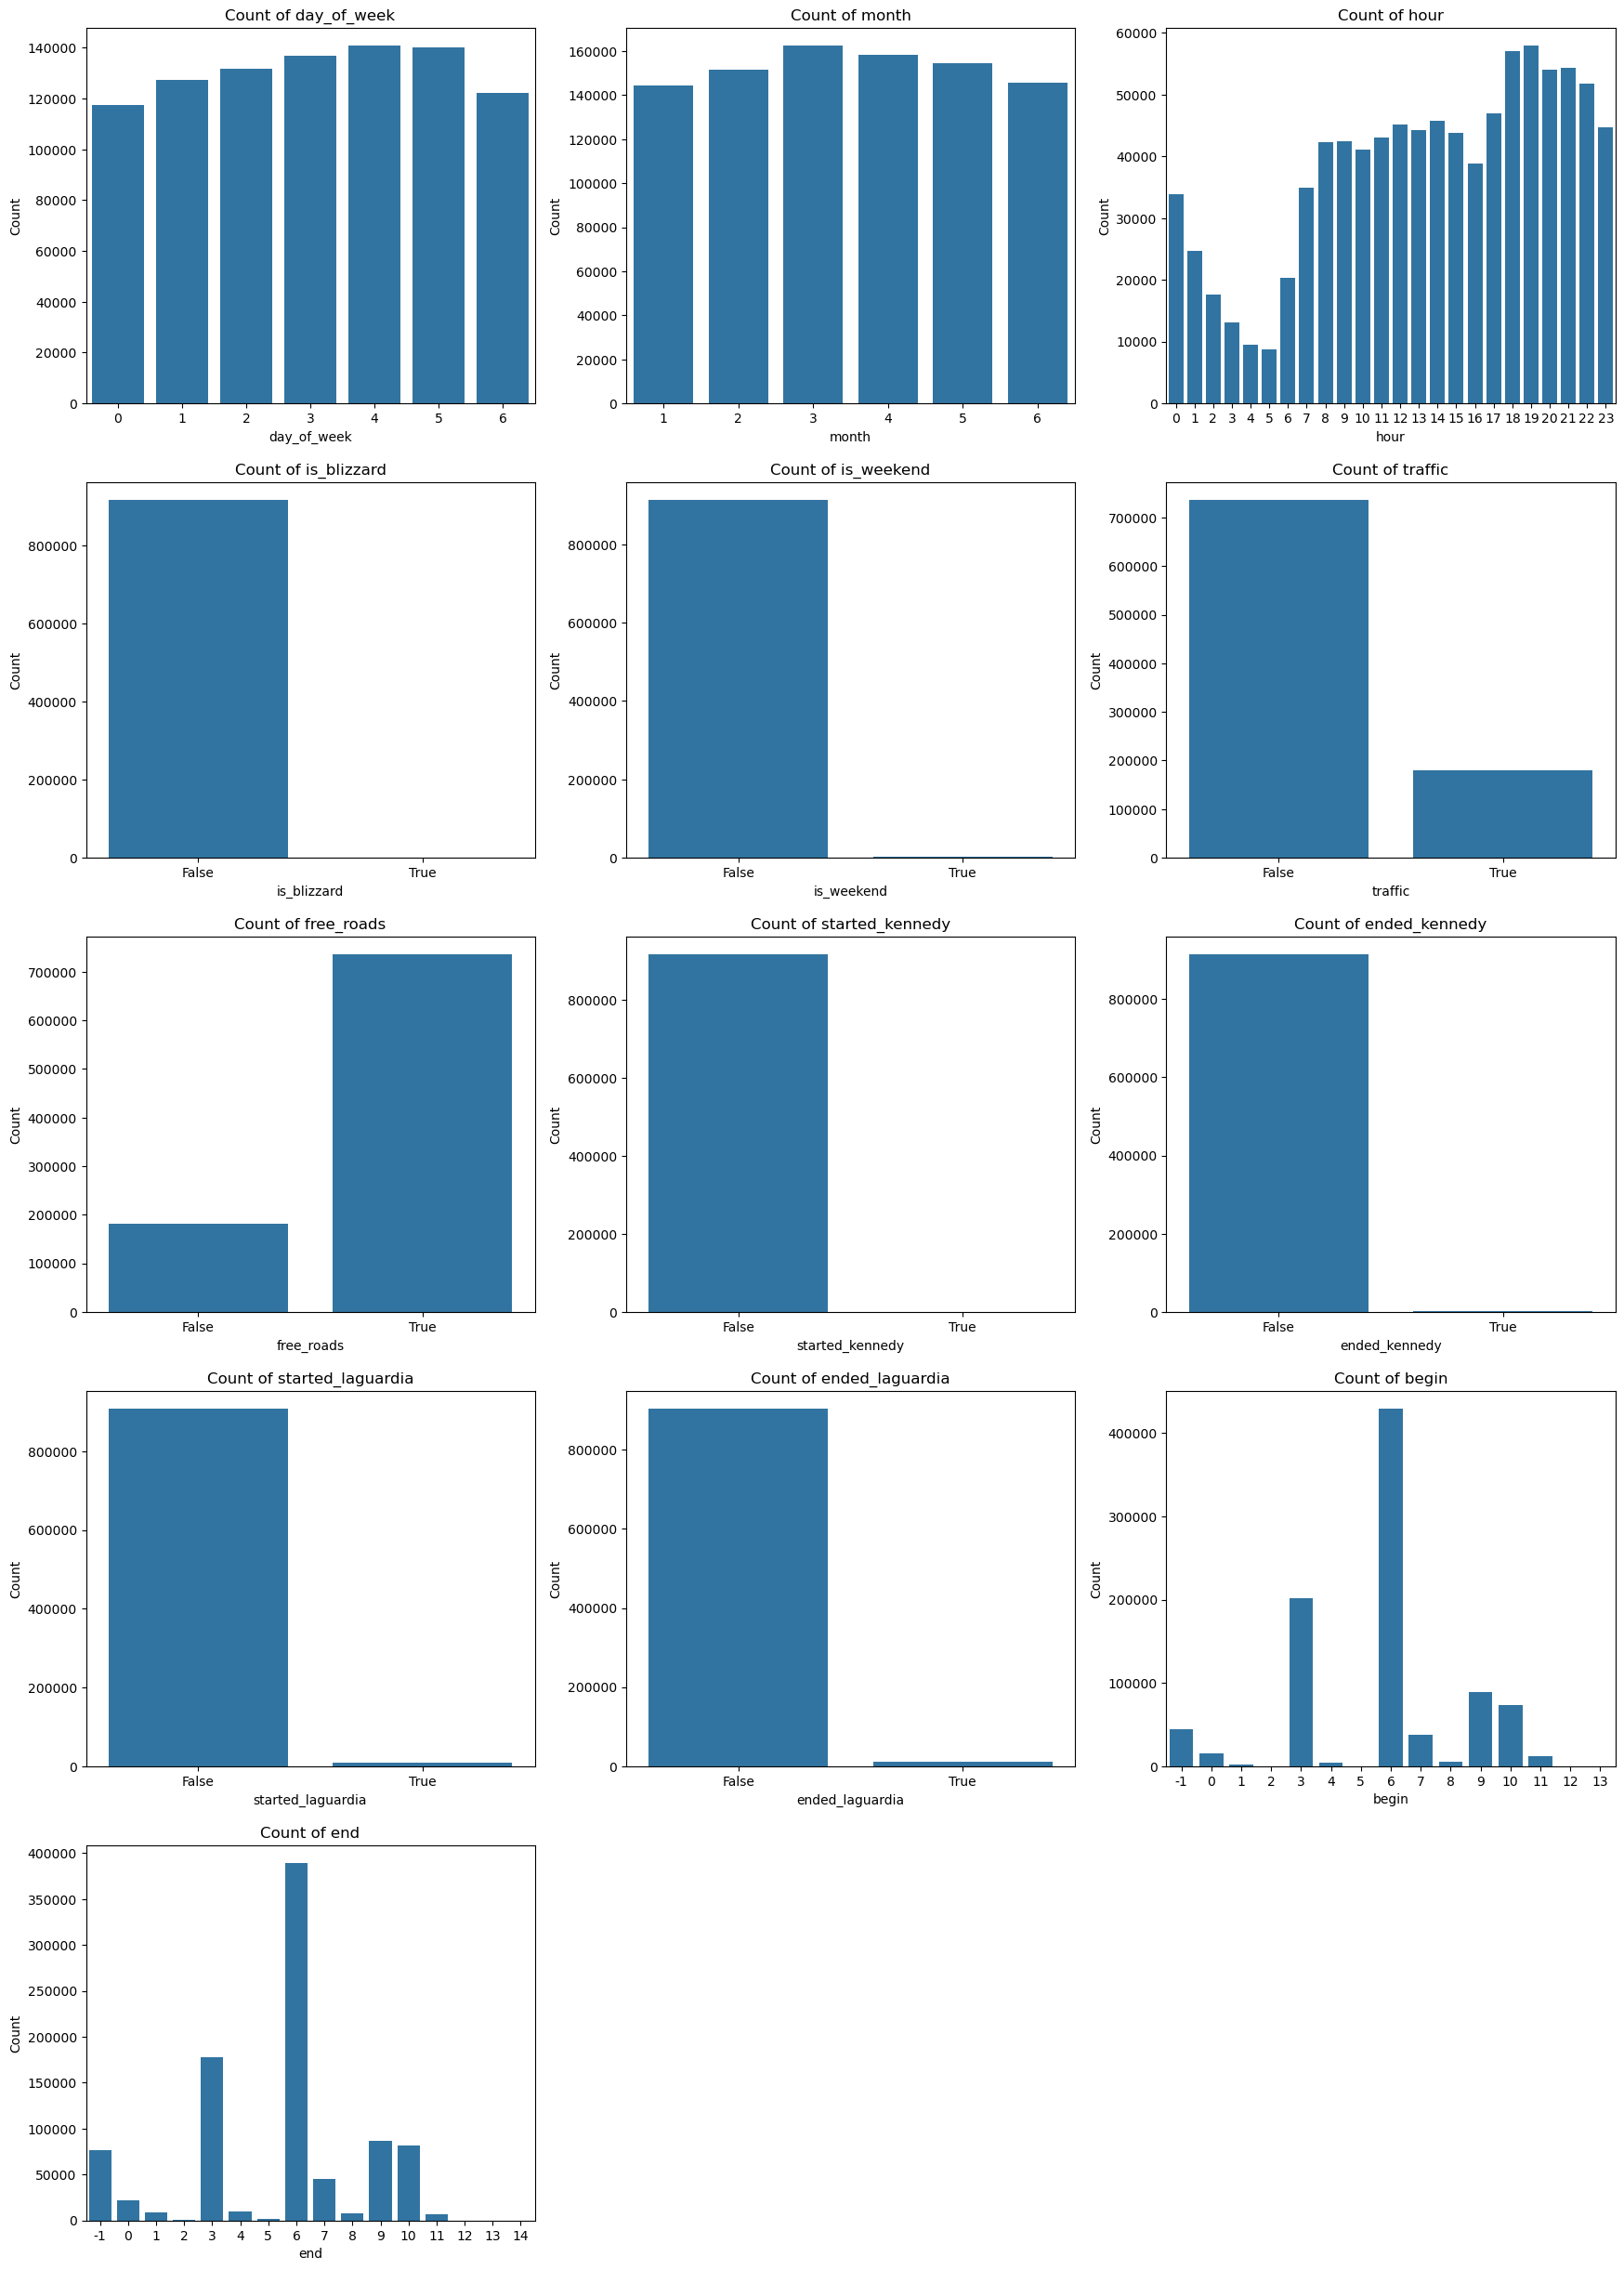

In [101]:
num_features = len(cat)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
fig.tight_layout(pad=4.0)

axes = axes.flatten()

for i, feature in enumerate(cat):
    ax = axes[i]
    sns.countplot(data=train_df, x=feature, ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

Бинарные признаки трогать нет смысла, временные кажется распредлены +- равномерно, буду работать с begin и end

In [102]:
train_df_united_features = train_df.copy()

In [103]:
train_df_united_features.begin = train_df_united_features.begin.replace({2: 1, 4: 1, 5: 1, 8: 1, 12: 1, 13: 1})
train_df_united_features.end = train_df_united_features.end.replace({5: 2, 12: 2, 13: 2, 14: 2})

In [104]:
X_train, y_train = train_df_united_features.drop('log_trip_duration', axis=1), train_df_united_features.log_trip_duration

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [105]:
cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end']
num = ['day_of_year', 'log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.47777390211656967


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [106]:
print(f'Number of featrues before OHE: {len(cat + num)}')
print(f'Number of featrues after OHE: {preprocessor.fit_transform(train_df).shape[1]}')

Number of featrues before OHE: 15
Number of featrues after OHE: 86


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [107]:
X_train, y_train = train_df.drop('log_trip_duration', axis=1), train_df.log_trip_duration

In [108]:
from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

lasso_pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, lasso_pipeline.predict(X_test))}')

RMSLE = 0.7942884455622217


In [109]:
X_saved = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y_saved = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

Ridge явно получился лучше

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
alphas = np.logspace(-4, 4, 20)

ridge_results = []
lasso_results = []
best_alpha_ridge, best_alpha_lasso = 0, 0
best_ridge_rmsle, best_lasso_rmsle = 1, 1

null_coeffs_lasso = []

for a in alphas:
    ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=a))
    ])
    
    ridge_pipeline.fit(X_train, y_train)
    ridge_rmsle = rmsle(y_val, ridge_pipeline.predict(X_val))
    ridge_results.append(ridge_rmsle)
    if ridge_rmsle < best_ridge_rmsle:
        best_ridge_rmsle = ridge_rmsle
        best_alpha_ridge = a

    lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso(alpha=a))
    ])
    
    lasso_pipeline.fit(X_train, y_train)
    lasso_rmsle = rmsle(y_val, lasso_pipeline.predict(X_val))
    lasso_results.append(lasso_rmsle)
    if lasso_rmsle < best_lasso_rmsle:
        best_lasso_rmsle = lasso_rmsle
        best_alpha_lasso = a
    
    lasso_coeffs = lasso_pipeline.named_steps['lasso'].coef_
    null_coeffs_lasso.append(np.sum(lasso_coeffs == 0))
        


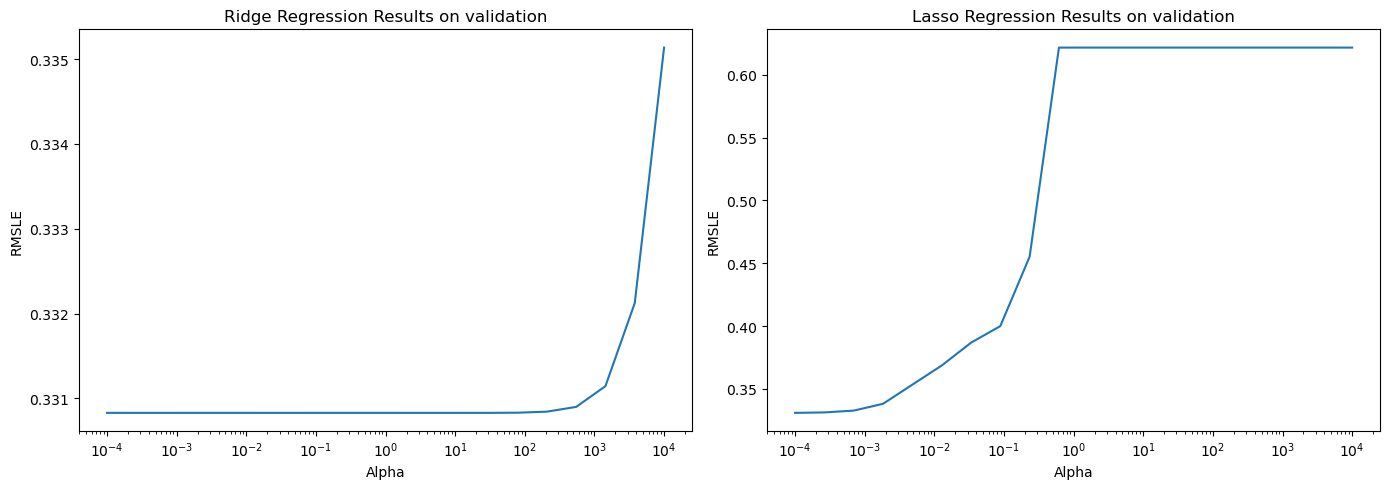

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=alphas, y=ridge_results, ax=axes[0])
axes[0].set_title('Ridge Regression Results on validation')
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('RMSLE')

sns.lineplot(x=alphas, y=lasso_results, ax=axes[1])
axes[1].set_title('Lasso Regression Results on validation')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('RMSLE')

plt.tight_layout()
plt.show()


In [112]:
print(f'Best alpha for ridge: {best_alpha_ridge}')
print(f'Best alpha for lasso: {best_alpha_lasso}')

Best alpha for ridge: 11.288378916846883
Best alpha for lasso: 0.0001


In [113]:
ridge_pipeline = Pipeline(steps=[
('preprocessor', preprocessor),
('ridge', Ridge(alpha=best_alpha_ridge))
])
ridge_pipeline.fit(X_train, y_train)

lasso_pipeline = Pipeline(steps=[
('preprocessor', preprocessor),
('lasso', Lasso(alpha=best_alpha_lasso))
])
lasso_pipeline.fit(X_train, y_train)

best_alpha_ridge_rmsle = rmsle(y_test, ridge_pipeline.predict(X_test))
best_alpha_lasso_rmsle = rmsle(y_test, lasso_pipeline.predict(X_test))

print(f'RMSLE for Ridge with beast alpha: {best_alpha_ridge_rmsle}')
print(f'RMSLE for Lasso with beast alpha: {best_alpha_lasso_rmsle}')

RMSLE for Ridge with beast alpha: 0.4776398689691754
RMSLE for Lasso with beast alpha: 0.47841084805113104


Сохраните наилучшее значение, как бенчмарк на будущее

In [114]:
best_rmsle = best_alpha_ridge_rmsle

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

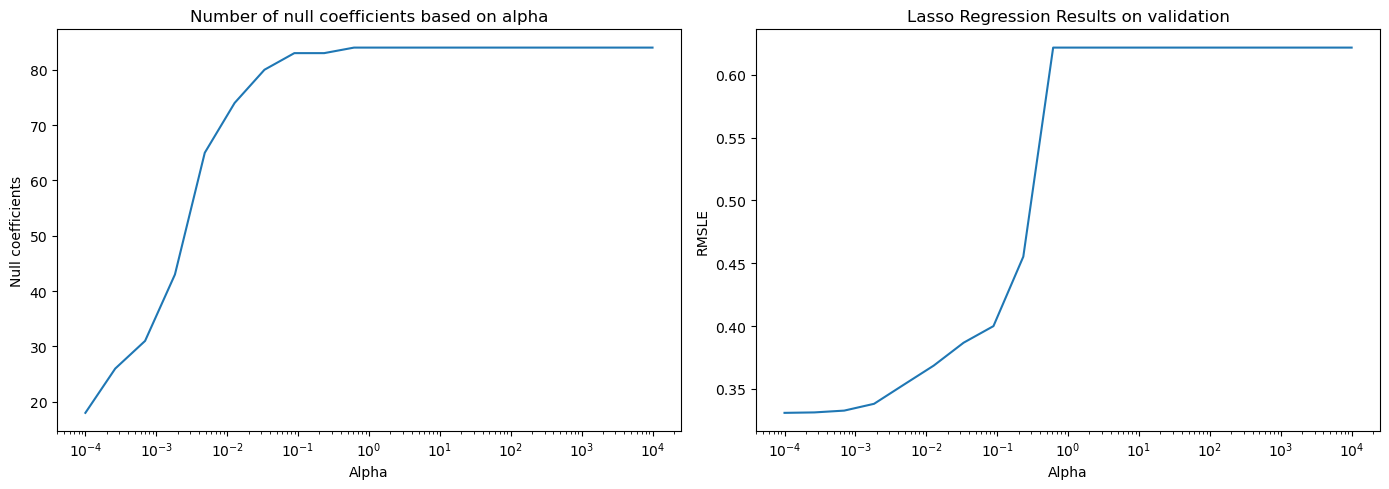

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=alphas, y=null_coeffs_lasso, ax=axes[0])
axes[0].set_title('Number of null coefficients based on alpha')
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Null coefficients')

sns.lineplot(x=alphas, y=lasso_results, ax=axes[1])
axes[1].set_title('Lasso Regression Results on validation')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('RMSLE')

plt.tight_layout()
plt.show()

Судя по графикам при занулении половины весов качество модели на валидационной выборке падает примерно на 0.07

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответс**: Допустим как правило из 1 района маршрут получается не долгим, так же допустим как и маршрут во 2 район. Однако может быть такое, что именно маршрут из 1 района во 2 по какой то причине (неудобнвй маршрут приходиться что то объезжать и тд) может быть очень долгим, такую взаимосвязь надо выделить отдельно, чтобы модель лучше работала

In [116]:
X_saved['begin_end_pairs'] = list(zip(X_saved.begin, X_saved.end))
top_100_pairs = X_saved.begin_end_pairs.value_counts().nlargest(100).index
X_saved['begin_end_category'] = X_saved.begin_end_pairs.apply(lambda pair: pair if pair in top_100_pairs else -1).astype(str)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_saved, y_saved, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end', 'begin_end_category']
num = ['day_of_year', 'log_haversine']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.3783917315774782


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Манхэттенское расстояние по сути для нас еще один способ измерить расстояние между началом и концом поездки. Так как это буквально расстояние основанное на построении маршрутов на решетчетой плоскости (прямо как в нашем случае), это может сыграть нам на руку

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

Из википедии:

Manhattan has a phenomenon of this kind due to its extensive urban canyons and its rectilinear street grid that is <ins>**rotated 29° clockwise**</ins> from true east–west.

In [118]:
rotation_matrix = np.array([
    [np.cos(29), -np.sin(29)],
    [np.sin(29), np.cos(29)]
])

def rotate_coordinates(lon, lat, rotation_matrix):
    coords = np.vstack([lon, lat])
    rotated_coords = rotation_matrix @ coords
    return rotated_coords[0], rotated_coords[1]

Честно говооря не понял зачем рисовать какие то оси и что то показывать но ладно

In [119]:
def show_coordinates_system():
    center_location = [40.785091, -73.968285]
    m = folium.Map(location=center_location, zoom_start=13)
    
    x_axis_start = [40.7322, -74]
    x_axis_end = [40.82, -73.94]

    y_axis_start = [40.7952, -74.0248]
    y_axis_end = [40.74, -73.89]

    folium.PolyLine(
        locations=[x_axis_start, x_axis_end],
        color='blue',
    ).add_to(m)

    folium.PolyLine(
        locations=[y_axis_start, y_axis_end],
        color='blue',
    ).add_to(m)
    
    return m

In [120]:
show_coordinates_system()

In [121]:
X_saved['pickup_x'], X_saved['pickup_y'] = rotate_coordinates(
    X_saved.pickup_longitude,
    X_saved.pickup_latitude,
    rotation_matrix
)

X_saved['dropoff_x'], X_saved['dropoff_y'] = rotate_coordinates(
    X_saved.dropoff_longitude,
    X_saved.dropoff_latitude,
    rotation_matrix
)

In [122]:
X_saved['manhattan_distance'] = (
    abs(X_saved.dropoff_x - X_saved.pickup_x)
    +
    abs(X_saved.dropoff_y - X_saved.pickup_y)
    )

X_saved['log_manhattan_distance'] = np.log1p(X_saved.manhattan_distance)

In [123]:
print(f'Correlation between manhattan_distance and log_trip_duration: {X_saved.manhattan_distance.corr(y_saved)}')
print(f'Correlation between log_haversine and log_trip_duration: {X_saved.log_haversine.corr(y_saved)}')

Correlation between manhattan_distance and log_trip_duration: 0.6177102501583975
Correlation between log_haversine and log_trip_duration: 0.7654127309608709


С хаверсайн корреляция больше

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_saved, y_saved, test_size=0.3, random_state=10)

cat = ['day_of_week', 'month', 'hour', 'is_blizzard', 'is_weekend', 'traffic', 'free_roads',
       'started_kennedy', 'ended_kennedy', 'started_laguardia', 'ended_laguardia', 'begin', 'end', 'begin_end_category']
num = ['day_of_year', 'log_manhattan_distance']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat),
        ('num', StandardScaler(), num)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

pipeline.fit(X_train, y_train)
print(f'RMSLE = {rmsle(y_test, pipeline.predict(X_test))}')

RMSLE = 0.45244793488877993


Стало хуже так как все таки не весь Нью Йорк состоит из клеток и в общем случае haversine лучше апроксимирует расстояние из-за каких то инных факторов (что мы видим по корреляции)

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [125]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.